In [2]:
import pandas as pd
import datetime as dt
import numpy as np

import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
IN_PATH = '/Users/anokhin/Desktop/vtb24.txt'
OUT_PATH = '/Users/anokhin/Desktop/vtb24.la.jss'

In [12]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y%m%d")
df1 = pd.read_csv(
    IN_PATH, sep="\t", 
    header=None, names=['cuid', 'emails', 'okids', 'vkids', 'other_dt', 'retro_dt', 'age', 'sex'],
    converters={'retro_dt': ts_parser, 'other_dt': ts_parser},
    dtype={"okids": str, "vkids": str}
)
print df1["retro_dt"].min()
df1.head()

2015-09-01 00:00:00


,cuid,emails,okids,vkids,other_dt,retro_dt,age,sex
0,10002014,HvVnT8/3LQmkYmuPwTbCNoFZ5jAGYw5E,NaN,600666,2015-07-23,2015-09-21,0.280299,1
1,10004696,NaN,573569434121,NaN,2015-07-12,2015-09-10,0.432597,1
2,10005044,UN8OFAXyr5XUNBdSwhgwXw==,562634023038,11521256,2015-08-07,2015-10-06,0.306450,0
3,10007037,NaN,551402823926,202663427,2015-08-16,2015-10-15,0.747317,1
4,10009571,"RXrYkp9VO5HVhutiFtV6lU9WhNM9oR5n,99SOpKG2ldDUN...",NaN,58982929,2015-08-19,2015-10-18,0.404469,1


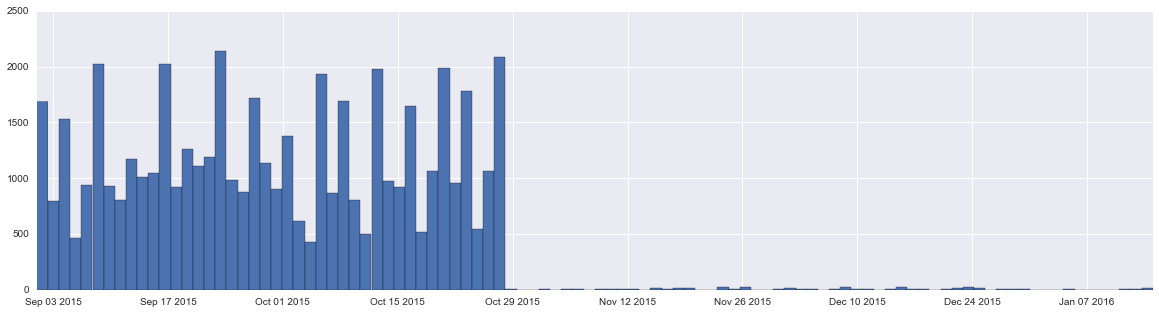

In [7]:
pl.figure(figsize=(20, 5))
df1['retro_dt'].hist(bins=100)
pl.show()

In [8]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":%s,"category":{"int":%d},"start":{"long":%d},"end":{"long":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [9]:
with open(OUT_PATH, "w") as out_file:
    for i, row in df1.iterrows():
        end_ts = int(row["retro_dt"].strftime("%s"))
        start_ts = end_ts - MONTH_SECONDS        
        
        emails = row["emails"].split(",") if pd.notnull(row["emails"]) else [""]
        okids = row["okids"].split(",") if pd.notnull(row["okids"]) else [""]
        vkids = row["vkids"].split(",") if pd.notnull(row["vkids"]) else [""]
        
        for email in emails:
            for okid in okids:
                for vkid in vkids:
                    em = STRING_PATTERN % email if email else "null"
                    ok = STRING_PATTERN % okid if okid else "null"
                    vk = STRING_PATTERN % vkid if vkid else "null"
                    print >> out_file, USER_PATTERN % ("", ok, em, vk, 1, start_ts, end_ts)

In [11]:
%%bash
head /Users/anokhin/Desktop/vtb24.txt
head /Users/anokhin/Desktop/vtb24.la.jss

10002014	HvVnT8/3LQmkYmuPwTbCNoFZ5jAGYw5E		600666	20150723	20150921	0.280299	1.00
10004696		573569434121		20150712	20150910	0.432597	1.00
10005044	UN8OFAXyr5XUNBdSwhgwXw==	562634023038	11521256	20150807	20151006	0.306450	0.00
10007037		551402823926	202663427	20150816	20151015	0.747317	1.00
10009571	RXrYkp9VO5HVhutiFtV6lU9WhNM9oR5n,99SOpKG2ldDUNBdSwhgwXw==		58982929	20150819	20151018	0.404469	1.00
10010925	Zznj1JuFpqyLm7aODoRcrk9WhNM9oR5n	165129391446	23423678	20150809	20151008	0.370145	0.00
10011668		546522875917		20150718	20150916	0.559573	1.00
10013169			186686954	20150709	20150907	0.614144	1.00
10016488		185029211903	23793394	20150815	20151014	0.268247	1.00
10022571		166192176340		20150730	20150928	0.381196	1.00
{"vid":"","okid":null,"email":{"string":"HvVnT8/3LQmkYmuPwTbCNoFZ5jAGYw5E"},"vkid":{"string":"600666"},"category":{"int":1},"start":{"long":1440104400},"end":{"long":1442782800}}
{"vid":"","okid":{"string":"573569434121"},"email":null,"vkid":null,"category":{"int":1},"start"

In [14]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":null,"category":{"int":%d},"start":{"long":%d},"end":{"long":%d}}'
with open("/Users/anokhin/Desktop/active_emails.la.jss", "w") as out_file:
    with open("/Users/anokhin/Desktop/active_emails") as ae:
        for line in ae:
            print >> out_file, USER_PATTERN % ("", "null", STRING_PATTERN % line.strip(), 2, 1438376400, 1446325200)

In [15]:
%%bash

head /Users/anokhin/Desktop/active_emails.la.jss

{"vid":"","okid":null,"email":{"string":"0005VV5bqiN9oAJnsMvgdg=="},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"string":"000COj9vqyBR/Lpbr/DkTaMQBF2FyZE1"},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"string":"000COj9vqyCPD1BJq3VfZU9WhNM9oR5n"},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"string":"000L+gxPs3Fy7WA4AcTPUYFZ5jAGYw5E"},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"string":"0014OAhSp94szF1+n0AMxoFZ5jAGYw5E"},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"string":"001DU6rzm2HUNBdSwhgwXw=="},"vkid":null,"category":{"int":2},"start":{"long":1438376400},"end":{"long":1446325200}}
{"vid":"","okid":null,"email":{"